# Using Dense Neural Networks on Boston housing price regression problem.

In this notebook, we are using dense neural networks to predict house prices.


**Prerequisites:**
* **Basic knowledge of Deep Learning.**

**Libraries:**
* **Keras:** A library for creating neural networks in few lines.
* **Matplotlib:** Matplotlib is a plotting library. You can use it to draw different types of graphs, like line, scattered, bar, etc.



# Introduction

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$). The objective is to predict the value of prices of the house using the given features.

Some of these features are:

* Per capita crime rate by town
* Proportion of residential land zoned for lots over 25,000 sq. ft
* Proportion of non-retail business acres per town
* Nitric oxide concentration (parts per 10 million)
* Average number of rooms per dwelling, etc.

# Preprocessing

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(input_train, output_train), (input_test, output_test) = boston_housing.load_data()

Now we normalize our features. This helps our model to converge mininmum loss faster in the training process.

In [0]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

mean = input_train.mean(axis=0)
input_train -= mean

std = input_train.std(axis=0)
input_train /= std

input_test -= mean
input_test /= std

# Model

Let's create our model. We are initiating our sequential object with a list that contains the layers we want to use.

* **Dense (Fully Connected):** They are the simple layers that have connections between every input and output neuron. 

We will use ReLUs (Rectified Linear Units) as activation functions for the hidden layers.

In [0]:
model = Sequential([
  Dense(128, activation="relu", input_shape=(len(input_train[0]),)),
  Dense(128, activation="relu"),
  Dense(1)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


Now we have to decide which optimizer and loss function to use for our model. Since this is a regression problem Mean Square Error could be our choice. 

And for our optimizer, we can pick Adam or Adadelta. They are usually my first picks because it's shown that they work really well with lots of different problems.


**Loss Function:** Mean Square Error

For more information about Keras loss functions [click here](https://keras.io/losses/).


**Optimizer:** Adam

For more information about Keras optimizers [click here](https://keras.io/optimizers/).



In [0]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# Training

Let's train our model. Additional to loss, mean absolute error will be calculated and  printed out on every epoch.

In [0]:
history = model.fit(input_train, output_train,
                    epochs=20,
                    validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/20
323/323 [==============================] - 0s 1ms/step - loss: 524.7666 - mean_absolute_error: 20.9549 - val_loss: 543.7773 - val_mean_absolute_error: 21.3950
Epoch 2/20
323/323 [==============================] - 0s 152us/step - loss: 434.1150 - mean_absolute_error: 18.6616 - val_loss: 427.6005 - val_mean_absolute_error: 18.6032
Epoch 3/20
323/323 [==============================] - 0s 165us/step - loss: 310.0682 - mean_absolute_error: 15.3084 - val_loss: 276.2600 - val_mean_absolute_error: 14.3831
Epoch 4/20
323/323 [==============================] - 0s 163us/step - loss: 171.9257 - mean_absolute_error: 10.8320 - val_loss: 138.7478 - val_mean_absolute_error: 9.3176
Epoch 5/20
323/323 [==============================] - 0s 528us/step - loss: 85.4628 - mean_absolute_error: 7.2816 - val_loss: 78.4372 - val_mean_absolute_error: 6.8890
Epoch 6/20
323/323 [==============================] - 0s 157us/step - loss: 61.5135 - mean_absolute_er

We can see how training went using our history object.

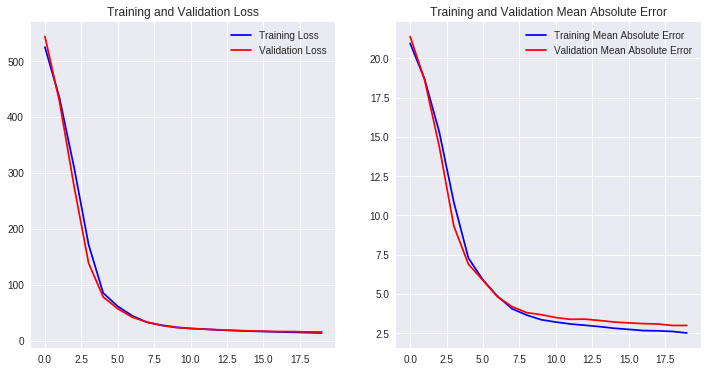

In [0]:
loss = history.history['loss']
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Training and Validation Loss")
p1.set_title("Training and Validation Mean Absolute Error")

p0l0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Validation Loss")

p1l0 = p1.plot(epochs, acc, "-b", label="Training Mean Absolute Error")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Validation Mean Absolute Error")

legend0 = p0.legend()
legend1 = p1.legend()

# Evaluation

Finally the training process is done. Now we can evaluate our model's performance on the test set.

In [0]:
score = model.evaluate(input_test, output_test)

print('Test Loss:', score[0])
print('Test Mean Absolute Error:', score[1])

102/102 [==============================] - 0s 115us/step
Test Loss: 22.984460718491498
Test Mean Absolute Error: 3.544190145006367


As you can see, our model's predictions have 3.5 mean absolute error on the test set.

Let's predict couple of examples.


*Side note: You can't predict single examples with "model.predict()". But you can reshape the data to have an extra batch size dimention to fix it.*

In [0]:
predictions = model.predict(input_test[0:5])

true_prices = output_test[0:5]

for i in range(len(predictions)):
  print("Prediction:", round(predictions[i][0], 1), ",",
        "True Price:", true_prices[i])

Prediction: 9.4 , True Price: 7.2
Prediction: 16.2 , True Price: 18.8
Prediction: 21.7 , True Price: 19.0
Prediction: 29.6 , True Price: 27.0
Prediction: 26.2 , True Price: 22.2
